# Brandon Mack

## Revised Research question/interests

**What is the relationship between a players weapon preferences, their accuracy with said weapons and their overall performance in terms of kills, wins and their rating in competitive play. How will these relationships differ across the ranks and as players get to a higher rank will there be a specific gun that players use to achieve this**

To do this I will cross reference a players favourite weapon with their accuracy and then from there, I will compare those stats against the overall stats(kills, wins, rating). I believe that the relationship between rank and gun choice directly affects the overall stats of a player as someone with a sniper may have a higher accuracy percentage but less kills and vice versa. 

## Research question/interests

**Do players who have a higher headshot percentage tend to get more kills and have a higher rank? Does the number of headshots a player accumulates correlate directly to their rank and the amount of wins they achieve.**


I will collect this data based directly off of the headshot percentage per player per rank, this will allow me to see a direct comparison between the high level players and low level players. I will also be comparing each individual players body shot to head shot ratio to mathematically determine if headshots lead to a higher skill level.

In [85]:
import pandas as pd
df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


## Exploratory Data Analysis

In [86]:
rating_sorted = df['rating'].sort_values(ascending=True)
kills_sorted = df['kills'].sort_values(ascending=True)
wins_sorted = df['wins'].sort_values(ascending=True)
hspc_sorted = df['headshot_percent'].sort_values(ascending=True)

combined_sorted = pd.concat([rating_sorted, kills_sorted, wins_sorted, hspc_sorted], axis=1)
combined_sorted.to_csv('kills_headshot_rating_wins_BM.csv', index=False)

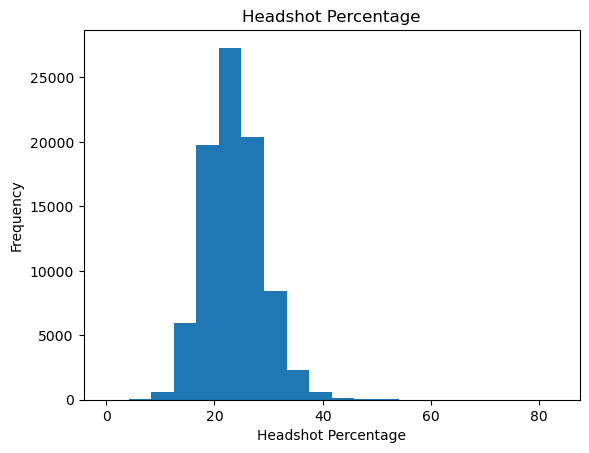

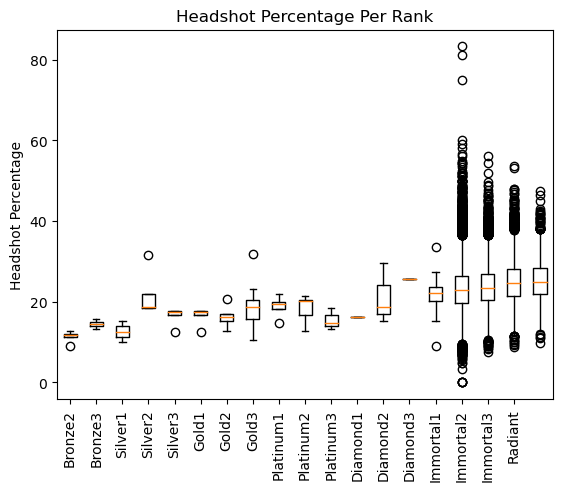

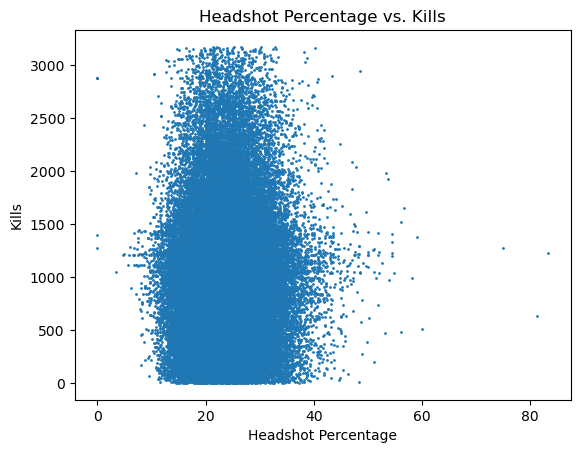

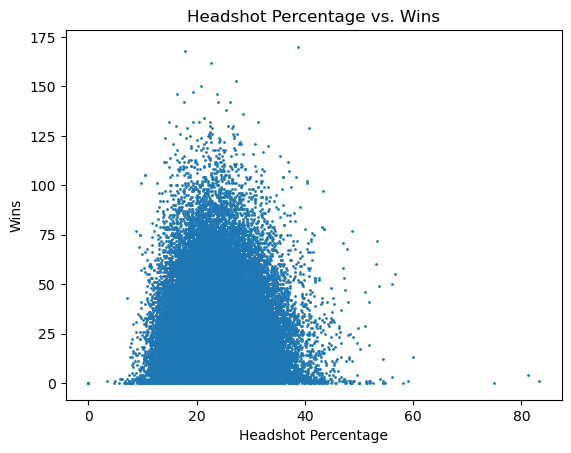

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/val_stats.csv", low_memory = False)

# Histogram of headshot percentage
plt.hist(df['headshot_percent'], bins = 20)
plt.title('Headshot Percentage')
plt.xlabel('Headshot Percentage')
plt.ylabel('Frequency')
plt.show()

# Box plot showing headshot percentage per rank
plt.boxplot([df['headshot_percent'][df['rating'] == 'Bronze 2'],
             df['headshot_percent'][df['rating'] == 'Bronze 3'],
             df['headshot_percent'][df['rating'] == 'Silver 1'],
             df['headshot_percent'][df['rating'] == 'Silver 2'],
             df['headshot_percent'][df['rating'] == 'Silver 3'],
             df['headshot_percent'][df['rating'] == 'Silver 3'],
             df['headshot_percent'][df['rating'] == 'Gold 1'],
             df['headshot_percent'][df['rating'] == 'Gold 2'],
             df['headshot_percent'][df['rating'] == 'Gold 3'],
             df['headshot_percent'][df['rating'] == 'Platinum 1'],
             df['headshot_percent'][df['rating'] == 'Platinum 2'],
             df['headshot_percent'][df['rating'] == 'Platinum 3'],
             df['headshot_percent'][df['rating'] == 'Diamond 1'],
             df['headshot_percent'][df['rating'] == 'Diamond 2'],
             df['headshot_percent'][df['rating'] == 'Diamond 3'],
             df['headshot_percent'][df['rating'] == 'Immortal 1'],
             df['headshot_percent'][df['rating'] == 'Immortal 2'],
             df['headshot_percent'][df['rating'] == 'Immortal 3'],
             df['headshot_percent'][df['rating'] == 'Radiant']])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['Bronze2', 'Bronze3', 'Silver1', 'Silver2', 'Silver3', 'Gold1', 'Gold2', 'Gold3', 'Platinum1', 'Platinum2', 'Platinum3', 'Diamond1', 'Diamond2', 'Diamond3', 'Immortal1', 'Immortal2', 'Immortal3', 'Radiant'], rotation=90)
plt.title('Headshot Percentage Per Rank')
plt.ylabel('Headshot Percentage')
plt.show()

# Scatter plot of headshot percentage vs. kills
plt.scatter(df['headshot_percent'], df['kills'], s = 1)
plt.xlabel('Headshot Percentage')
plt.ylabel('Kills')
plt.yscale('linear')
plt.title('Headshot Percentage vs. Kills')
plt.show()

# Scatter plot of headshot percentage vs. wins
plt.scatter(df['headshot_percent'], df['wins'], s = 1)
plt.xlabel('Headshot Percentage')
plt.ylabel('Wins')
plt.title('Headshot Percentage vs. Wins')
plt.show()

## Milestone 4

### Task 1

In [162]:
# import libraries
import pandas as pd
import numpy as np

In [163]:
# 1 Load Data
df = pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
df

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [164]:
# 2 Clean Data
cols = ['name', 'rating', 'kills', 'deaths', 'kd_ratio', 'assists', 'headshots', 'headshot_percent', 'wins', 'gun1_name']
df = df.loc[:, cols]
df

,name,rating,kills,deaths,kd_ratio,assists,headshots,headshot_percent,wins,gun1_name
0,ShimmyXD,Radiant,"1,506","1,408",1.07,703,992,24.9,59,Vandal
1,XSET Cryo,Radiant,"1,608","1,187",1.35,206,879,28.3,52,Vandal
2,PuRelittleone,Radiant,"1,115","1,064",1.05,267,720,24.0,42,Vandal
3,Boba,Radiant,"1,134",812,1.40,157,856,37.3,32,Vandal
4,i love mina,Radiant,869,781,1.11,213,534,24.4,32,Vandal
...,...,...,...,...,...,...,...,...,...,...
85673,Kazutora,Radiant,603,508,1.19,296,342,21.4,32,Phantom
85674,el lobo marino,Radiant,885,606,1.46,271,650,30.1,32,Phantom
85675,p9pzet,Radiant,919,733,1.25,136,613,30.2,26,Vandal
85676,EZ4TGD EnSBuwu,Immortal 3,204,174,1.17,101,132,22.2,8,Vandal


In [166]:
# 3 Process Data
df = df[~df['rating'].isin(['Unrated', 'Bronze 1', 'Bronze 2', 'Bronze 3', 'Silver 1', 'Silver 2', 'Silver 3'])]
df = df.sort_values(by='rating', ascending=False)
df

,name,rating,kills,deaths,kd_ratio,assists,headshots,headshot_percent,wins,gun1_name
0,ShimmyXD,Radiant,"1,506","1,408",1.07,703,992,24.9,59,Vandal
85600,Sync Mezzu,Radiant,"2,135","2,158",0.99,595,"1,519",30.2,59,Vandal
85637,Pretz,Radiant,"3,152","2,834",1.11,797,"1,829",19.4,92,Phantom
85599,1HuruK,Radiant,590,649,0.91,204,418,26.4,26,Vandal
85608,RzT EvoLuZionz,Radiant,470,462,1.02,233,211,13.8,26,Vandal
...,...,...,...,...,...,...,...,...,...,...
46965,sam3t,Diamond 3,255,268,0.95,91,178,24.3,10,Vandal
58457,ãƒ³ã‚®ãƒ¢ãƒ‚ã‚£ã‚¤ã‚¤ã‚¤,Diamond 2,348,293,1.19,101,231,25.6,11,Phantom
71239,ã¡ã‚…ã£ãºã‚ã‹ãƒ¼ã£ãº,Diamond 1,522,425,1.23,115,239,15.3,12,Phantom
66327,è¤ªã›äºº,Diamond 1,322,405,0.80,173,155,18.6,14,Vandal


In [167]:
# 4 Wrangle Data

df = df.rename(columns={
    'name': 'Gamertag',
    'rating': 'Rank',
    'kills': 'Kills',
    'deaths': 'Deaths',
    'kd_ratio': 'K/D_Ratio',
    'assists': 'Assists',
    'headshots': 'Headshots',
    'headshot_percent': 'Headshot %',
    'wins': 'Wins',
    'gun1_name': 'Main_Gun'
})
df
    

,Gamertag,Rank,Kills,Deaths,K/D_Ratio,Assists,Headshots,Headshot %,Wins,Main_Gun
0,ShimmyXD,Radiant,"1,506","1,408",1.07,703,992,24.9,59,Vandal
85600,Sync Mezzu,Radiant,"2,135","2,158",0.99,595,"1,519",30.2,59,Vandal
85637,Pretz,Radiant,"3,152","2,834",1.11,797,"1,829",19.4,92,Phantom
85599,1HuruK,Radiant,590,649,0.91,204,418,26.4,26,Vandal
85608,RzT EvoLuZionz,Radiant,470,462,1.02,233,211,13.8,26,Vandal
...,...,...,...,...,...,...,...,...,...,...
46965,sam3t,Diamond 3,255,268,0.95,91,178,24.3,10,Vandal
58457,ãƒ³ã‚®ãƒ¢ãƒ‚ã‚£ã‚¤ã‚¤ã‚¤,Diamond 2,348,293,1.19,101,231,25.6,11,Phantom
71239,ã¡ã‚…ã£ãºã‚ã‹ãƒ¼ã£ãº,Diamond 1,522,425,1.23,115,239,15.3,12,Phantom
66327,è¤ªã›äºº,Diamond 1,322,405,0.80,173,155,18.6,14,Vandal


In [168]:
# Save Processed Data
df.to_csv('processed_data_BM.csv', index=False)

df

,Gamertag,Rank,Kills,Deaths,K/D_Ratio,Assists,Headshots,Headshot %,Wins,Main_Gun
0,ShimmyXD,Radiant,"1,506","1,408",1.07,703,992,24.9,59,Vandal
85600,Sync Mezzu,Radiant,"2,135","2,158",0.99,595,"1,519",30.2,59,Vandal
85637,Pretz,Radiant,"3,152","2,834",1.11,797,"1,829",19.4,92,Phantom
85599,1HuruK,Radiant,590,649,0.91,204,418,26.4,26,Vandal
85608,RzT EvoLuZionz,Radiant,470,462,1.02,233,211,13.8,26,Vandal
...,...,...,...,...,...,...,...,...,...,...
46965,sam3t,Diamond 3,255,268,0.95,91,178,24.3,10,Vandal
58457,ãƒ³ã‚®ãƒ¢ãƒ‚ã‚£ã‚¤ã‚¤ã‚¤,Diamond 2,348,293,1.19,101,231,25.6,11,Phantom
71239,ã¡ã‚…ã£ãºã‚ã‹ãƒ¼ã£ãº,Diamond 1,522,425,1.23,115,239,15.3,12,Phantom
66327,è¤ªã›äºº,Diamond 1,322,405,0.80,173,155,18.6,14,Vandal


### Task 2

In [169]:
# Step 1
df = (pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
    .loc[:, ['name', 'rating', 'kills', 'deaths', 'kd_ratio', 'assists', 'headshots', 'headshot_percent', 'wins', 'gun1_name']]
    .rename(columns={'name': 'Gamertag','rating': 'Rank','kills': 'Kills','deaths': 'Deaths','kd_ratio': 'K/D_Ratio','assists': 'Assists','headshots': 'Headshots','headshot_percent': 'Headshot %','wins': 'Wins', 'gun1_name': 'Main_Gun'})
    .sort_values('Rank', ascending=False)
    .loc[lambda x: ~x['Rank'].isin(['Unrated', 'Bronze 1', 'Bronze 2', 'Bronze 3', 'Silver 1', 'Silver 2', 'Silver 3'])]
    .dropna()
    .loc[lambda x: x['Gamertag'].str.match('^[a-zA-Z0-9]+')]
)
df


,Gamertag,Rank,Kills,Deaths,K/D_Ratio,Assists,Headshots,Headshot %,Wins,Main_Gun
41157,UP A K,Radiant,"2,144","2,021",1.06,550,"1,509",28.1,62,Vandal
41158,DESTRUCT1VEE,Radiant,"2,175","1,672",1.30,554,"1,593",28.9,63,Vandal
53570,AndrewYT03,Radiant,"1,280","1,072",1.19,264,"1,090",40.0,39,Vandal
53569,NWG Death01,Radiant,"1,982","1,869",1.06,374,"1,066",24.7,58,Vandal
53568,Biggie Cheese,Radiant,"1,765","1,791",0.99,568,"1,173",24.0,59,Vandal
...,...,...,...,...,...,...,...,...,...,...
46964,Cry,Diamond 3,502,448,1.12,191,303,20.3,18,Vandal
75962,Seektorking,Diamond 3,"1,522","1,392",1.09,454,960,21.5,48,Vandal
47788,eLrUsT,Diamond 3,519,440,1.18,213,274,18.1,19,Vandal
46965,sam3t,Diamond 3,255,268,0.95,91,178,24.3,10,Vandal


In [171]:
# Step 2

def load_and_process(path_to_csv_file):
    
    df = (pd.read_csv('../data/raw/val_stats.csv', low_memory = False)
    .loc[:, ['name', 'rating', 'kills', 'deaths', 'kd_ratio', 'assists', 'headshots', 'headshot_percent', 'wins', 'gun1_name']]
    .rename(columns={'name': 'Gamertag','rating': 'Rank','kills': 'Kills','deaths': 'Deaths','kd_ratio': 'K/D_Ratio','assists': 'Assists','headshots': 'Headshots','headshot_percent': 'Headshot %','wins': 'Wins', 'gun1_name': 'Main_Gun'})
    .sort_values('Rank', ascending=False)
    .loc[lambda x: ~x['Rank'].isin(['Unrated', 'Bronze 1', 'Bronze 2', 'Bronze 3', 'Silver 1', 'Silver 2', 'Silver 3'])]
    .dropna()
    .loc[lambda x: x['Gamertag'].str.match('^[a-zA-Z0-9]+')]
    )

    return df

In [ ]:
#Step 3

import pandas as pd
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import brandon_m as B
else:
    import sys
    sys.path.append("./code")
    import brandon_m as B

df = B.load_and_process('../data/raw/val_stats.csv')
df 

### Task 3

I chose to do my analysis on the top Valorant players of the world, with my research questions revolving around the relationship between a player's weapon preferences and accuracy contrasted to the number of kills, wins and ratings in competitive play. My original question related to solely the rank and the number of kills but this resulted in having limited correlation the addition of the gun proved to show how much players depended on this to get to the rank they currently have. To clean my data, I removed any columns that did not relate to my specific research question and this left me with columns such as gamer tags, rank, kills, deaths, kd ratio, assists, headshots, headshot percentage, wins, and the primary gun used. I also dropped any players that had names that started with an ASCII character rather than an alpha or numeric character. The reason for this is this is commonly seen as "hacker or cheater" in the game as they have progressed up the ranks unfairly and that is why they were removed from my dataset. I also removed any NaN names as I did not feel they had any impact on my analysis and would end up giving me incorrect information. During my visualizations, it was common to see players of a higher rank have a higher headshot percentage close to 23% or higher, whereas the lower-level players hovered around the 10-15% mark. Overall the higher the rank the higher the headshot percentage and as in Valorant this will result in a 1 to 2 shot kill compared to 4 to 5 of a body shot and thus allows for easier kills so obviously higher ranked players would aim for this to get the upper hand. The number of headshots per gun was commonly the Vandal or the Phantom as these are the two most used guns in pro play due to their damage and accuracy statistics. Lastly, I believe that I was capable with my research question going quite in-depth and retrieving the results I wanted with the information I had, however looking back on it now I would have preffered to pick a more complex research question from the beginning and also ensure that the data I had was cleaned more thoroughly but I feel I have learned a lot from this and next time will be able to complete this in a much more efficient way.

